### Linear Regression with a Single Feature (or Simple Linear Regression)

#### Derivative reminder based on discrete data 

- idea of the derivative, in a fundamental sense, is to capture how a function changes as its input x changes.
- Graphically, it's often thought of as the "slope" or "rate of change" at any given point.
- the concept of the derivative can be approximated by the difference between consecutive points.
- Discrete data points, "small" refers to the difference between consecutive x values.


![derivative](./img/1/derivative_main_formula.png)

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

def discrete_derivative_for_x(x_value: int) -> float:    
    """
    This function computes the discrete derivative of the y-values 
    with respect to the x-values at a given x_value.
    
    :param x_value: The x-value at which the derivative is to be computed.
    :return: The discrete derivative at the given x_value.
    """
    if x_value not in x:
        raise ValueError("x_value not in the list!")

    index = x.index(x_value)

    # Calculate the derivative
    if index == 0:  # First point
        dy = y[index + 1] - y[index]
        dx = x[index + 1] - x[index]

        print(f"Change in y 'dy' = {y[index + 1]} - {y[index]} = {dy}")
        print(f"Change in x 'dx' = {x[index + 1]} - {x[index]} = {dx}")
    elif index == len(x) - 1:  # Last point
        dy = y[index] - y[index - 1]
        dx = x[index] - x[index - 1]

        print(f"Change in y 'dy' = {y[index]} - {y[index - 1]} = {dy}")
        print(f"Change in x 'dx' = {x[index]} - {x[index - 1]} = {dx}")
    else:  # Middle points
        dy = (y[index + 1] - y[index - 1]) / 2
        dx = (x[index + 1] - x[index - 1]) / 2

        print(f"Change in y 'dy' = ({y[index + 1]} - {y[index - 1]}) / 2 = {dy}")
        print(f"Change in x 'dx' = ({x[index + 1]} - {x[index - 1]}) / 2 = {dx}")

    # Explanation for the derivative
    print(f"\nThe derivative, dy/dx, represents the rate of change of y with respect to x.")
    print(f"For a small change in x (Δx = {dx}), y changes by Δy = {dy}.")
    print(f"Thus, the rate of change or the derivative dy/dx at x = {x_value} is approximately {dy/dx:.2f}.\n")

    return dy/dx

# Test the function with x=1 as the selected point
print(discrete_derivative_for_x(3))


In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]

def visualize_graph_with_derivative_at(x_value):
    derivative_value = discrete_derivative_for_x(x_value)
    point_y = y[x.index(x_value)]
    
    # Plot y against x
    plt.plot(x, y, '-o', label='Function y(x)')
    
    # Highlight the point x_value
    plt.scatter(x_value, point_y, color='red', zorder=5)  # zorder ensures the point is on top
    
    # Draw tangent line
    tangent_y = [point_y + derivative_value * (i - x_value) for i in x]
    plt.plot(x, tangent_y, '--', label='Tangent at x=' + str(x_value))
    
    # Display the derivative value
    plt.text(x_value, point_y, f"dy/dx ≈ {derivative_value:.2f}", verticalalignment='bottom', horizontalalignment='right')
    
    # Plot settings
    plt.title("Graph of y(x) with Tangent Line Representing Derivative")
    plt.xlabel("x values")
    plt.ylabel("y values")
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize graph with derivative at x=3
visualize_graph_with_derivative_at(3)


#### Derivative based on continuous data 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

# Fit a polynomial to the data
degree = len(x) - 1  # Degree of the polynomial to fit
coefs = np.polyfit(x, y, degree)

# Get the polynomial
p = np.poly1d(coefs)

# Get the derivative of the polynomial
p_deriv = np.polyder(p)

# Define a function to calculate the continuous derivative at any x value
def continuous_derivative(x_value: float) -> float:
    """
    This function computes the continuous derivative of the polynomial at a given x_value.
    
    :param x_value: The x-value at which the derivative is to be computed.
    :return: The continuous derivative at the given x_value.
    """
    return p_deriv(x_value)

# Plot the polynomial and its derivative
x_smooth = np.linspace(x[0], x[-1], 500)
y_smooth = p(x_smooth)
y_deriv_smooth = p_deriv(x_smooth)

plt.figure(figsize=(10, 5))

# Plot original data points
plt.scatter(x, y, label='Data Points')

# Plot the polynomial
plt.plot(x_smooth, y_smooth, label='Polynomial Fit')

# Plot the derivative of the polynomial
plt.plot(x_smooth, y_deriv_smooth, label='Derivative of Fit', linestyle='--')

plt.title('Polynomial Fit and its Derivative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Test the function with x=3 as the selected point
print(f"The continuous derivative at x = 3 is approximately {continuous_derivative(3):.2f}")


### Partial Derivative
- A partial derivative is a derivative where the function depends on more than one variable
- Differentiate with respect to one variable while keeping the other variables constant.
- Rate at which the function changes as x changes, while all other variables (y,z,…) are held fixed.
- Calculating partial derivative is as same as that of an ordinary derivative except we consider the other variables than the variable with respect to which we are differentiating as constants.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interp1d

x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
z = [1, 8, 27, 64, 125]

# Interpolating the points for a smooth curve
x_new = np.linspace(min(x), max(x), 300)
y_interp = interp1d(x, y, kind='cubic')
z_interp = interp1d(x, z, kind='cubic')

y_new = y_interp(x_new)
z_new = z_interp(x_new)

# Now let's create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the original points
ax.scatter(x, y, z, color='r', label='Data Points')

# Plotting the curvature
ax.plot(x_new, y_new, z_new, label='Curvature', color='blue')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.legend()

plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Data points
x = np.array([1, 2, 3, 4, 5], dtype=float)
y = np.array([1, 4, 9, 16, 25], dtype=float)
z = np.array([1, 8, 27, 64, 125], dtype=float)

# Fit the plane (z = ax + by + c)
# We use a pseudo-inverse since it's an overdetermined system
A = np.vstack([x, y, np.ones(len(x))]).T
C, residuals, rank, s = np.linalg.lstsq(A, z, rcond=None)

# Calculate the partial derivatives at each x, y point (gradient)
partial_x = C[0]
partial_y = C[1]

# Create a grid to plot the surface
xx, yy = np.meshgrid(np.linspace(min(x), max(x)), np.linspace(min(y), max(y)))
zz = C[0]*xx + C[1]*yy + C[2]

# 3D Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(xx, yy, zz, alpha=0.5, rstride=100, cstride=100, color='y', edgecolor='none')

# Plot the points
ax.scatter(x, y, z, color='r')

# Choose a point to display the partial derivatives
chosen_index = 2  # For example, the third point
chosen_x = x[chosen_index]
chosen_y = y[chosen_index]
chosen_z = z[chosen_index]

# Draw gradient vectors (partial derivatives)
ax.quiver(chosen_x, chosen_y, chosen_z, partial_x, 0, 0, length=3, color='blue', arrow_length_ratio=0.05, label='∂z/∂x')
ax.quiver(chosen_x, chosen_y, chosen_z, 0, partial_y, 0, length=3, color='green', arrow_length_ratio=0.05, label='∂z/∂y')

# Labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('3D Surface with Partial Derivatives')

# Legend
ax.legend()

# Show plot
plt.show()


#### Simple Linear Regression from scrutch 


MSE: 43.832718457725946
MSE: 2.4549278922960753
MSE: 0.4391353713649751
MSE: 0.34077549412926433
MSE: 0.33582017314149504
MSE: 0.33541596064483
MSE: 0.335234552495439
MSE: 0.33506509752768465
MSE: 0.33489731712060705
MSE: 0.33473070314608494


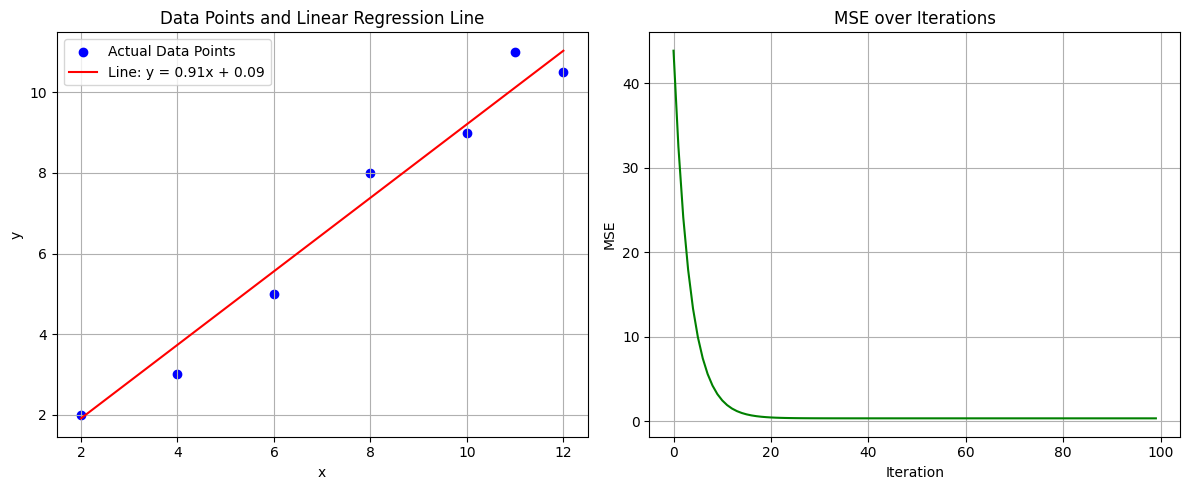

In [2]:
# y = w*x+b
import matplotlib.pyplot as plt

# Data
x = [2,4,6,8,10,11,12]
y = [2,3,5,8,9,11,10.5]

# Define a function to compute the Mean Squared Error (MSE)
def compute_mse(w, b, x, y):
    """
    Compute the Mean Squared Error (MSE) based on the formula:
    MSE = (1/n) * Σ(y_i - (w*x_i + b))^2
    where:
    - n is the number of data points
    - y_i is the actual value of the ith data point
    - x_i is the value of the predictor variable for the ith data point
    - w is the weight or coefficient of the predictor variable
    - b is the bias or y-intercept
    
    Parameters:
    - w: weight or coefficient of predictor variable x
    - b: bias or y-intercept
    - x: list or array of predictor variable values
    - y: list or array of observed outcome values
    
    Returns:
    - MSE value
    """
    # Calculate the number of data points
    n = len(x)
    # Compute the sum of squared differences between observed (y) and predicted (w*x[i] + b) values
    total_error = sum((y[i] - (w*x[i] + b))**2 for i in range(n))
    
    # Return the average of the squared differences (i.e., MSE)
    return total_error / n


# Compute gradients
def compute_gradients(w, b, x, y):
    features_x_len = len(x)
    
    # Initialize gradients
    total_gradient_w = 0
    total_gradient_b = 0
    
    # Calculate total gradient for w and b
    for i in range(features_x_len):
        predicted_y = w*x[i] + b
        difference = y[i] - predicted_y
        
        # Accumulated sum of individual gradients for each data point concerning 'w'
        total_gradient_w += x[i] * difference
        total_gradient_b += difference
    
    # Calculate the mean gradient for w and b
    # In simple words - "If I tweak the weight w a little bit, how does my error change?".

    # Calculate the average gradient with respect to w (weight/parameter) across all data points. 
    # The gradient represents the rate of change of the cost function with respect to w. 
    # The negative sign indicates the direction to adjust w to minimize the cost, 
    # the factor of 2 comes from differentiating the squared term in the Mean Squared Error,
    # and the division by features_x_len gives the average gradient across all data points.
    dw = (-2/features_x_len) * total_gradient_w
    db = (-2/features_x_len) * total_gradient_b
    
    # Print the gradients
    #print("Partial Derivative with respect to w:", dw)
    #print("Partial Derivative with respect to b:", db)
    
    return dw, db


# Gradient Descent Algorithm for linear regression
def gradient_descent(x, y, w_init, b_init, learning_rate, num_iterations):
    # Initial values for weight (w) and bias (b)
    w, b = w_init, b_init
    
    # A list to keep track of Mean Squared Error (MSE) for each iteration
    mse_history = []

    for i in range(num_iterations):
        # Compute the gradient of the loss with respect to w and b
        dw, db = compute_gradients(w, b, x, y)
        
        # Update the weight and bias using the computed gradients and learning rate
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Compute the current Mean Squared Error (MSE) after the update
        mse = compute_mse(w, b, x, y)
        
        mse_history.append(mse)
    
    return w, b, mse_history


def plot_results(x, y, w, b, mse_history):
    plt.figure(figsize=(12, 5))

    # Data Points and Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Actual Data Points')
    plt.plot(x, [w*xi + b for xi in x], color='red', label=f'Line: y = {w:.2f}x + {b:.2f}')
    plt.title('Data Points and Linear Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # MSE over Iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(mse_history)), mse_history, color='green')
    plt.title('MSE over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
learning_rate = 0.001
num_iterations = 100
initial_w = 0
initial_b = 0

final_w, final_b, mse_history = gradient_descent(x, y, initial_w, initial_b, learning_rate, num_iterations)

for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])
plot_results(x, y, final_w, final_b, mse_history)



## Why are these Partial Derivatives Important?

In gradient descent, these partial derivatives guide the update steps. By understanding how the error changes concerning each parameter (either w or b), we can adjust the parameters to move towards a minimum error. The "gradient" in gradient descent is essentially a vector of these partial derivatives, pointing in the direction of the steepest increase of our error. By moving in the opposite direction (thus the negative signs in your equations), we aim to decrease the error and find an optimal set of parameters.

In [ ]:
# Data
x = [2,4,6,8,10,11,12]
y = [2,3,5,8,9,11,10.5]

def compute_mse(w, b, x, y):
    """Compute the Mean Squared Error."""
    n = len(x)
    total_error = sum((y[i] - (w*x[i] + b))**2 for i in range(n))
    return total_error / n

def compute_partial_derivatives(w, b, x, y):
    """Compute the partial derivatives of the MSE concerning w and b."""
    features_let = len(x)
    
    # Derivative with respect to w
    dMSE_dw = (-2/features_let) * sum(x[i] * (y[i] - (w*x[i] + b)) for i in range(features_let))
    
    # Derivative with respect to b
    dMSE_db = (-2/features_let) * sum(y[i] - (w*x[i] + b) for i in range(features_let))
    
    return dMSE_dw, dMSE_db

# Test the partial derivatives with initial values for w and b (e.g., w=1, b=1)
w, b = 1, 1
dw, db = compute_partial_derivatives(w, b, x, y)
print(f"Partial derivative concerning w: {dw}")
print(f"Partial derivative concerning b: {db}")


# Multiple Linear Regression.

In multiple linear regression, we model the relationship between two or more predictors and the response.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x1 = [2,4,6,8,10,11,12]
x2 = [5,9,13,17,21,25,27]

y = [2,3,5,8,9,11,10.5]

def compute_mse(w1, w2, b, x1, x2, y):
    """Compute the Mean Squared Error."""
    n = len(x1)
    total_error = sum((y[i] - (w1*x1[i] + w2*x2[i] + b))**2 for i in range(n))
    return total_error / n

# Compute gradients
def compute_gradients(w1, w2, b, x1, x2, y):
    features_len = len(y)
    
    # Initialize gradients
    total_gradient_w1 = 0
    total_gradient_w2 = 0
    total_gradient_b = 0
    
    # Calculate total gradient for w and b
    for i in range(features_len):
        # y = w1*x1 + w2*x2 + b
        predicted_y = w1*x1[i] + w2*x2[i] + b
        difference = y[i] - predicted_y
        
        # Accumulated sum of individual gradients for each data point concerning 'w'
        total_gradient_w1 += x1[i] * difference
        total_gradient_w2 += x2[i] * difference
        total_gradient_b += difference
    
    # Calculate the mean gradient for w and b
    # In simple words - "If I tweak the weight w a little bit, how does my error change?".

    # Calculate the average gradient with respect to w (weight/parameter) across all data points. 
    # The gradient represents the rate of change of the cost function with respect to w. 
    # The negative sign indicates the direction to adjust w to minimize the cost, 
    # the factor of 2 comes from differentiating the squared term in the Mean Squared Error,
    # and the division by features_x_len gives the average gradient across all data points.
        dw1 = (-2/features_len) * total_gradient_w1
        dw2 = (-2/features_len) * total_gradient_w2
        db = (-2/features_len) * total_gradient_b
    
    # Print the gradients
    return dw1, dw2, db


# Gradient Descent Algorithm
def gradient_descent(x1, x2, y, w1_init, w2_init, b_init, learning_rate, num_iterations):
    w1, w2, b = w1_init, w2_init, b_init
    mse_history = []
    
    for i in range(num_iterations):
        dw1, dw2, db = compute_gradients(w1, w2, b, x1, x2, y)
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db
        mse = compute_mse(w1, w2, b, x1, x2, y)
        mse_history.append(mse)
    
    return w1, w2, b, mse_history

def plot_results(x1, x2, y, w1, w2, b, elev=30, azim=30):
    fig = plt.figure(figsize=(10, 8))

    # Data Points and Regression Plane in 3D
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.scatter(x1, x2, y, color='blue', label='x1 Data Points', s=70) # s is the marker size
    ax1.scatter(x2, x1, y, color='red', label='x2 Data Points', s=70)
    
    # Create a meshgrid for the plane
    x_range = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 10)
    y_range = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    Y = w1*X1 + w2*X2 + b
    
    ax1.plot_surface(X1, X2, Y, alpha=0.5, rstride=100, cstride=100)
    ax1.set_title('Data Points and Linear Regression Plane')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.view_init(elev=elev, azim=azim)  # Set the view angle
    ax1.legend()

    plt.tight_layout()
    plt.show()



# Parameters
learning_rate = 0.001
num_iterations = 100

initial_w1 = 0
initial_w2 = 0
initial_b = 0

final_w1, final_w2, final_b, mse_history = gradient_descent(x1, x2, y, initial_w1, initial_w2, initial_b, learning_rate, num_iterations)
for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])

angles = [(30, 0), (30, 45), (30, 90), (30, 135)]
for angle in angles:    
    plot_results(x1, x2, y, final_w1, final_w2, final_b, angle[0], angle[1])

# Multiple linear regression based on matrix to vector multilication 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#2D array (Matrix) with 10 rows and 2 columns
x_features_matrix = np.array([[1, 2],
                              [2, 4],
                              [3, 6],
                              [4, 8],
                              [5, 10],
                              [6, 12],
                              [7, 14], 
                              [8, 16], 
                              [9, 18],  
                              [10, 20]])

y = np.array([1, 2, 6, 10, 12, 16, 17, 18, 19, 20])

def compute_mse(w_vector, b, x_features_matrix, y):
    n = len(y)
    #Matrix to vector multiplication
    y_pred = np.dot(x_features_matrix, w_vector) + b  # Including bias in the prediction
    errors = y - y_pred
    mse = np.sum(errors**2) / n
    return mse


def compute_gradients_matrices(W, init_b, X, y):
    n = len(y)
    # Predicted values
    y_pred = np.dot(X, W) + init_b
    errors = y - y_pred
    
    # Gradients computation for W
    gradients_W = -2/n * np.dot(X.T, errors)
    # Gradient computation for init_b (sum over errors because derivative w.r.t. b is 1 for each example)
    gradient_b = -2/n * np.sum(errors)
    
    return gradients_W, gradient_b

def gradient_descent_matrices(X, y, initial_w, init_b, learning_rate, num_iterations):
    W = initial_w
    b = init_b
    mse_history = []

    for i in range(num_iterations):
        # Calculate MSE and store it
        mse = compute_mse(W, b, X, y)
        mse_history.append(mse)

        # Compute gradients
        gradients_W, gradient_b = compute_gradients_matrices(W, b, X, y)

        # Update weights and bias
        W -= learning_rate * gradients_W
        b -= learning_rate * gradient_b
        
    return W, b, mse_history


def plot_results_matrix_mult(X, y, W, b, elev=30, azim=30):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    
    # Separate X into x1 and x2 for visualization
    x1 = X[:, 0]
    x2 = X[:, 1]

    # Scatter x1 and x2 with y values in different colors
    ax1.scatter(x1, x2, y, color='blue', label='x1 Data Points', s=70)
    ax1.scatter(x2, x1, y, color='red', label='x2 Data Points', s=70)
    
    # Create a meshgrid for the prediction plane
    x_range = np.linspace(min(x1), max(x1), 10)
    y_range = np.linspace(min(x2), max(x2), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    
    # Calculate predictions for the plane using matrix multiplication
    Y = X1 * W[0] + X2 * W[1] + b
    
    # Plot prediction plane
    ax1.plot_surface(X1, X2, Y, color='orange', alpha=0.5)
    
    ax1.set_title('Data Points and Linear Regression Plane')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.view_init(elev=elev, azim=azim)
    ax1.legend()
    plt.tight_layout()
    plt.show()



# Parameters
learning_rate = 0.001
num_iterations = 100

#1D array (also known as a vector) with shape (2,).
init_w_vector = np.array([0.01, 0.01]) # [w1, w2]
init_b=1

final_weight_matrix, b, mse_history = gradient_descent_matrices(x_features_matrix, y, init_w_vector, init_b, learning_rate, num_iterations)
for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])

angles = [(30, 0), (30, 45), (30, 135)]
for angle in angles:    
    plot_results_matrix_mult(x_features_matrix, y, final_weight_matrix, b, angle[0], angle[1])

### Implementation with https://scikit-learn.org/stable/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def plot_3d(X, y, model, angle1, angle2):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Predictions for the grid with 125 points along each axis
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 125), 
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 125))
    
    zz = model.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    
    # Scatter plot of the true values in red
    ax.scatter(X[:, 0], X[:, 1], y, color='red', s=50, label='True Values')
    
    # Scatter plot of the predicted points on the regression plane in blue
    ax.scatter(X[:, 0], X[:, 1], model.predict(X), color='blue', s=50, alpha=0.5, label='Predicted Values')
    
    # Surface plot of the predicted plane in a transparent shade
    ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)
    
    ax.set_xlabel('Bed')
    ax.set_ylabel('Bath')
    ax.set_zlabel('Price')
    ax.legend()
    
    ax.view_init(angle1, angle2)
    plt.show()

# Sample data
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
y = [5, 10, 20, 30, 40, 60, 70, 90, 100, 110]  # Sample target variable

X = np.column_stack((x1, x2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")    

# Plot from 4 different angles
angles = [(20, 30), (20, 60), (20, 90), (20, 120)]
for angle in angles:
    plot_3d(X_test, y_test, model, angle[0], angle[1])
